In [0]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
from keras.preprocessing.image import img_to_array, load_img

In [0]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
bs = 200

In [4]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [200]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
X_train.shape

(60000, 28, 28)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['seed']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


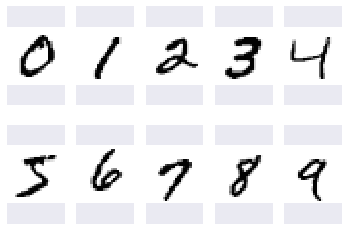

In [5]:
%pylab inline
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
  img = X_train[y_train == i][0].reshape(28, 28)
  ax[i].imshow(img, cmap='Greys', interpolation='nearest')
ax[0].set_xticks([])
ax[0].set_yticks([])
show()

In [0]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [0]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [0]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [106]:
X_train.shape

(60000, 784)

In [0]:
# define sgd model
def sgd_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
  
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
	return model

In [0]:
# define adagrad model
def adagrad_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
  
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
	return model

In [0]:
# define adam model
def adam_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
  
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [0]:
# build the model
model = sgd_model()

In [127]:
model.get_config()

{'layers': [{'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'RandomNormal',
     'config': {'mean': 0.0, 'seed': None, 'stddev': 0.05}},
    'kernel_regularizer': None,
    'name': 'dense_5',
    'trainable': True,
    'units': 784,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'softmax',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'RandomNormal',
     'config': {'mean': 0.0, 'seed': None, 'stddev': 0.05}},
    'kernel_regularizer': None,
    'name': 'dense_6',
    'trainable':

In [129]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=bs, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.2782 - acc: 0.9210 - val_loss: 0.1411 - val_acc: 0.9575
Epoch 2/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.1116 - acc: 0.9676 - val_loss: 0.0920 - val_acc: 0.9704
Epoch 3/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.0718 - acc: 0.9797 - val_loss: 0.0784 - val_acc: 0.9769
Epoch 4/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.0503 - acc: 0.9857 - val_loss: 0.0745 - val_acc: 0.9772
Epoch 5/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.0373 - acc: 0.9892 - val_loss: 0.0671 - val_acc: 0.9793
Epoch 6/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.0270 - acc: 0.9926 - val_loss: 0.0636 - val_acc: 0.9798
Epoch 7/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.0211 - acc: 0.9947 - val_loss: 0.0622 - 

In [28]:
history

In [31]:
model.get_weights()

[array([[-0.04067891, -0.01663   ,  0.01646814, ...,  0.02625924,
          0.00186153, -0.05936078],
        [ 0.0556249 , -0.04051981,  0.09514583, ..., -0.09421033,
         -0.03572423, -0.01438545],
        [-0.05584394, -0.03894864, -0.0223413 , ..., -0.10041159,
         -0.04311673,  0.01042833],
        ...,
        [-0.03836379, -0.01547784,  0.09151926, ..., -0.01031861,
         -0.03432941, -0.07082302],
        [ 0.03202686, -0.08683631,  0.06813446, ...,  0.11603751,
         -0.03371342,  0.02736845],
        [-0.01816093,  0.03203246, -0.02297845, ..., -0.02935493,
          0.08398807, -0.00830634]], dtype=float32),
 array([ 1.99570763e-03,  4.06645499e-02,  1.69959888e-02,  2.67276634e-03,
         5.31450321e-04, -4.59269527e-03,  1.10795582e-02,  1.67260561e-02,
        -4.57577553e-04,  4.57091909e-03,  8.59936234e-03,  1.37424637e-02,
         2.15436351e-02,  1.64535325e-02, -2.23673717e-03, -5.66302473e-03,
         2.66972161e-03,  6.17700908e-03,  1.57382395e

In [130]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

10000/10000 [==============================] - 1s 78us/step
Baseline Error: 1.83%


In [131]:
scores

[0.058208085484542246, 0.9817]

In [36]:
# list all data in history
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

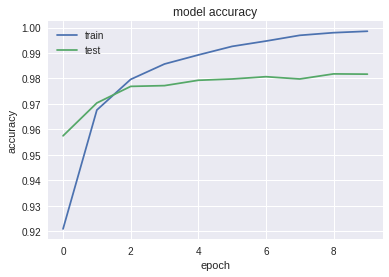

In [132]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

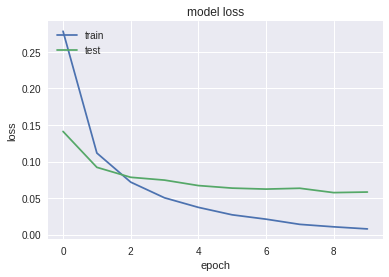

In [133]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

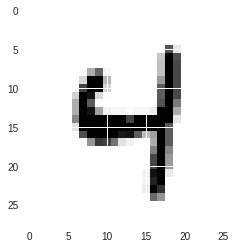

In [198]:
image_index = 1230
plt.imshow(X_test[image_index].reshape(28, 28), cmap='Greys')

In [199]:
pred = model.predict(X_test[image_index].reshape(1, 28*28))
pred.argmax()

array([[8.7246763e-13, 2.9863983e-11, 6.6701018e-09, 6.9182193e-10,
        9.9999559e-01, 4.7697418e-10, 2.1700771e-11, 1.4742753e-10,
        2.5941370e-08, 4.3652772e-06]], dtype=float32)